##**MINIPROYECTO 1** - TRATAMIENTO DE SEÑALES 3

**Estudiantes:**  

*   Alahkdmovak Rua Cardona.
*   Harrison Andres Henao. 


**Facultad de Ingeniería**

**Universidad de Antioquia**

In [36]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!wget 'https://github.com/alahkdmovak/Sismocaracterizacion/blob/main/sisTele.mat?raw=true' -O "sisTele.mat"
!wget 'https://github.com/alahkdmovak/Sismocaracterizacion/blob/main/sisReg.mat?raw=true' -O "sisReg.mat"
!wget 'https://github.com/alahkdmovak/Sismocaracterizacion/blob/main/sisLoc.mat?raw=true' -O "sisLoc.mat"

--2023-03-25 21:25:24--  https://github.com/alahkdmovak/Sismocaracterizacion/blob/main/sisTele.mat?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alahkdmovak/Sismocaracterizacion/raw/main/sisTele.mat [following]
--2023-03-25 21:25:24--  https://github.com/alahkdmovak/Sismocaracterizacion/raw/main/sisTele.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alahkdmovak/Sismocaracterizacion/main/sisTele.mat [following]
--2023-03-25 21:25:24--  https://raw.githubusercontent.com/alahkdmovak/Sismocaracterizacion/main/sisTele.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... con

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
from scipy import signal
import pandas as pd

## Importacion de datos y preparacion de los mismos

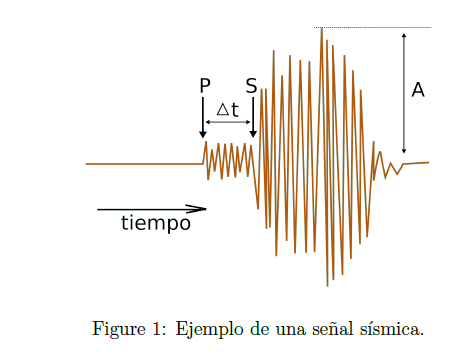

<ipython-input-39-6646ee30d261>:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_Loc = np.array(Y_Loc)
<ipython-input-39-6646ee30d261>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_Reg = np.array(Y_Reg)
<ipython-input-39-6646ee30d261>:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_Tele = np.array(Y_Tele)


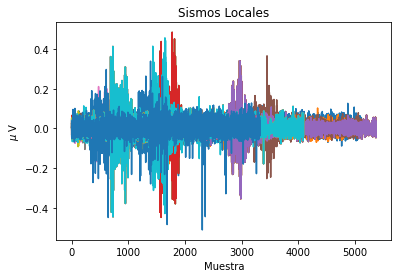

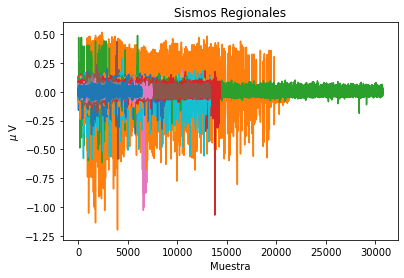

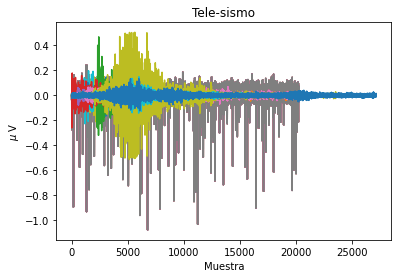

In [39]:
dataLoc = sc.loadmat('sisLoc.mat')
dataReg = sc.loadmat('sisReg.mat')
dataTele = sc.loadmat('sisTele.mat')

dataLoc.keys() # variables del diccionario
dataReg.keys() # variables del diccionario
dataTele.keys() # variables del diccionario

Y = dataLoc['Y']
fs = dataLoc['fs'][0][0]
z = dataReg['Y']
fs_Reg = dataReg['fs'][0][0]
w = dataTele['Y']
fs_Tele = dataTele['fs'][0][0]

Y_Loc = []
Y_Reg = []
Y_Tele = []

for i in range(len(Y)):  # Eliminacion de ceros al final de los arreglos
  pos = len(Y[i])
  if Y[i][-1]==0:
    for j in reversed(Y[i]):
      if j!=0:
        Y_Loc.append(Y[i][0:pos])
        break
      pos = pos - 1

for i in range(21):  # Eliminacion de ceros al final de los arreglos
  pos = len(z[i])
  if z[i][-1]==0:
    for j in reversed(z[i]):
      if j!=0:
        Y_Reg.append(z[i][0:pos])
        break
      pos = pos - 1
  else:
    Y_Reg.append(z[i])

for i in range(len(w)):  # Eliminacion de ceros al final de los arreglos
  pos = len(w[i])
  if w[i][-1]==0:
    for j in reversed(w[i]):
      if j!=0:
        Y_Tele.append(w[i][0:pos])
        break
      pos = pos - 1

Y_Loc = np.array(Y_Loc)
Y_Reg = np.array(Y_Reg)
Y_Tele = np.array(Y_Tele)

for j in range(21):  #Se elimina la media y se grafican los sismos
  Y_Loc[j] = Y_Loc[j]-np.mean(Y_Loc[j])
  plt.plot(Y_Loc[j].T)
  plt.title('Sismos Locales')
  plt.xlabel('Muestra')
  plt.ylabel('$\mu$ V')
plt.show()

for j in range(len(Y_Reg)):
  Y_Reg[j] = Y_Reg[j]-np.mean(Y_Reg[j])
  plt.plot(Y_Reg[j].T)
  plt.title('Sismos Regionales')
  plt.xlabel('Muestra')
  plt.ylabel('$\mu$ V')
plt.show()

for j in range(21):
  Y_Tele[j] = Y_Tele[j]-np.mean(Y_Tele[j])
  plt.plot(Y_Tele[j].T)
  plt.title('Tele-sismo')
  plt.xlabel('Muestra')
  plt.ylabel('$\mu$ V')
plt.show()

## Filtrado de las señales

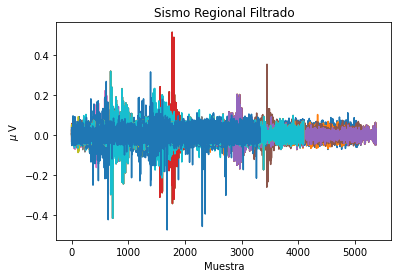

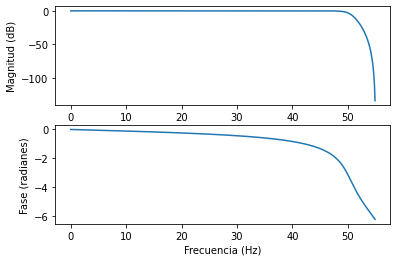

In [40]:
def Filtrado_pasabajas(x,fs,fc,order):    #Filtrado de la señal mediante un filtro butterworth pasabajas

  b, a = signal.butter(order, fc/(fs/2), 'low')

  # Aplicar el filtro a la señal
  y = signal.filtfilt(b, a, x)
  return y,b,a

fs = 110
fc = 50
order = 4

for i in range(21):
  Y_Loc[i],b,a = Filtrado_pasabajas(Y_Loc[i],fs,fc,order)
  Y_Reg[i],b,a = Filtrado_pasabajas(Y_Reg[i],fs_Reg+10,fc,order)
  Y_Tele[i],b,a = Filtrado_pasabajas(Y_Tele[i],fs_Tele+10,fc,order)

for j in range(21):
  plt.plot(Y_Loc[j].T)
  plt.xlabel('Muestra')
  plt.ylabel('$\mu$ V')
plt.title('Sismo Regional Filtrado')
plt.show()

w, h = signal.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
ax[0].set_ylabel('Magnitud (dB)')
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
ax[1].set_ylabel('Fase (radianes)')
ax[1].set_xlabel('Frecuencia (Hz)')
plt.show()


La eleccion del filtro pasabajas es porque se necesita filtrar la señal en el intervalo [1,50] Hz, la ubicar la frec de corte en 50 Hz se obtiene el intervalo [0,50] Hz el cual cumple con lo indicado ( se desprecian las frecuencias entre 0 y 1 Hz). Un filtro pasabanda tambien nos podria servir, pero en este caso al comparar los filtros se observa que la respuesta en fase es mucho mejor en el filtro pasbajas.

## Representacion de la señal en Espectros singulares

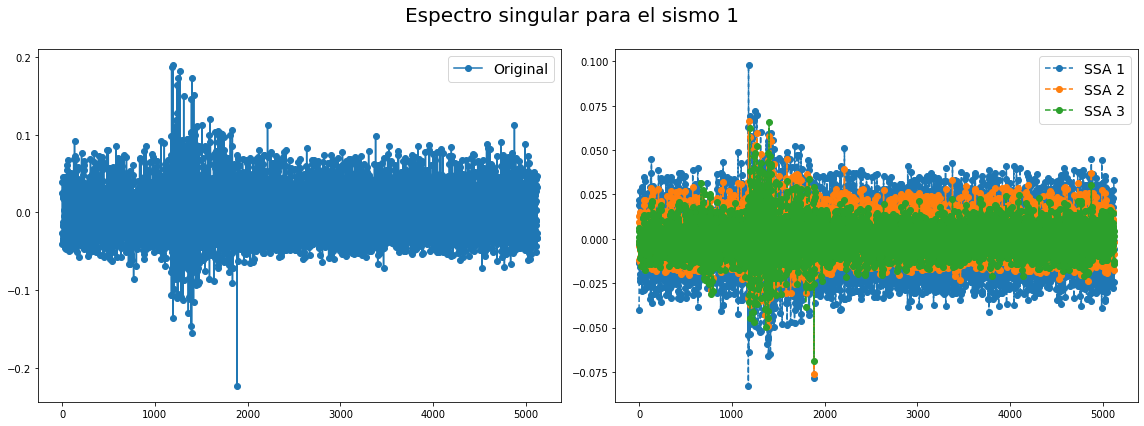

In [41]:
def singular_spectrum(X, groups):  #Analisis de espectros singulares
    ssa = SingularSpectrumAnalysis(window_size=groups)
    X_ssa = ssa.fit_transform(X)

    return X_ssa

Y_Loc_ssa = []
Y_Reg_ssa = []
Y_Tele_ssa = []

#extraccion de espectros singulares para cada señal 
 
for i in range(21): #se hace dentro del FOR debido al eliminar los ceros los arreglos quedan con diferentes dimensiones
  k = Y_Loc[i].reshape(1,-1)
  k2 = Y_Reg[i].reshape(1,-1)
  k3 = Y_Tele[i].reshape(1,-1)
  Y_Loc_ssa.append(singular_spectrum(k, 3))
  Y_Reg_ssa.append(singular_spectrum(k2, 3))
  Y_Tele_ssa.append(singular_spectrum(k3, 3))
  Y_ssa = Y_Loc_ssa + Y_Reg_ssa + Y_Tele_ssa

#Representacion grafica de la señal original VS espectros singulares
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.plot(Y_Loc[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for j in range(3):
    ax2.plot(Y_Loc_ssa[0][j], 'o--', label='SSA {0}'.format(j + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Espectro singular para el sismo 1', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

##STFT y Extraccion de caracteristicas para los espectros singulares


In [42]:
fs = 110

stft_f = []
stft_t = []
stft_Zxx = []
E = []
pmax = []
fmax =[]
mean_spectrum  = []
var_spectrum = []
max_spectrum = []
min_spectrum = []

for k in range(63):
  for j in range(3):
    f, t, Zxx = signal.stft(Y_ssa[k][j], fs, nperseg=512) #STFT
    stft_f.append(f)
    stft_t.append(t)
    stft_Zxx.append(Zxx)

    E.append(np.sum(np.abs(Zxx)**2,axis=0))  #energia
    absZxx = np.abs(Zxx)
    Pmax_Zxx = np.max(absZxx)
    pmax.append(Pmax_Zxx) # potencia 
    id = np.where(absZxx==Pmax_Zxx)
    fPmax_Zxx = np.squeeze(f[id[0]]) 
    fmax.append(fPmax_Zxx) #Frecuencia en Pmax
    mean_spectrum.append(np.mean(absZxx)) #Media
    var_spectrum.append(np.var(absZxx)) #Varianza
    max_spectrum.append(np.max(absZxx)) #Maximo del espectro
    min_spectrum.append(np.min(absZxx)) #Minimo del espectro

## Extraccion de caracteristicas estadisticas de la señal

In [43]:
from scipy.stats import entropy

#Codigo tomado del ejemplo dado en clase con Wavelets

def calculate_entropy(list_values):
  value,counter_values = np.unique(list_values, return_counts=True)
  entropyVal = entropy(counter_values, base=None)
  return entropyVal

def calculate_statistics(list_values):
  n5 = np.nanpercentile(list_values, 5)
  n25 = np.nanpercentile(list_values, 25)
  n75 = np.nanpercentile(list_values, 75)
  n95 = np.nanpercentile(list_values, 95)
  median = np.nanpercentile(list_values, 50)
  mean = np.nanmean(list_values)
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  rms = np.nanmean(np.sqrt(list_values**2))
  return [n5, n25, n75, n95, median, mean, std, var, rms]

def calculate_crossings(list_values):
  zero_crossing_indices = np.where(np.diff(np.signbit(list_values)))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.where(np.diff(np.signbit(list_values-np.nanmean(list_values))))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]

def get_features(list_values):
  entropy = calculate_entropy(list_values)
  crossings = calculate_crossings(list_values)
  statistics = calculate_statistics(list_values)
  return [entropy] + crossings + statistics

In [44]:
features_ssa = np.zeros((189,12))
k=0

# Se extraen las caracteristicas para cada espectro singular y se almacenan una matriz
for i in range(63):
  for j in range(3):
    aux = get_features(Y_ssa[i][j])
    features_ssa[k]=np.array(aux)
    k +=1

In [45]:
#etiquetas para cada sismo
L1 = 'Local'
L2 = 'Regional'
L3 = 'Telesismo'

#por cada sismo se crean 3 espectros singulares 21*3 = 63, 63 filas de caracteristicas para cada Tipo de sismo 
vL1 = np.tile(L1,63)
vL2 = np.tile(L2,63)
vL3 = np.tile(L3,63)

labels = np.concatenate((vL1,vL2,vL3),axis = 0)

E = np.array(E).reshape(-1,1)
pmax = np.array(pmax).reshape(-1,1)
fmax = np.array(fmax).reshape(-1,1)
mean_spectrum = np.array(mean_spectrum).reshape(-1,1)
var_spectrum = np.array(var_spectrum).reshape(-1,1)
max_spectrum = np.array(max_spectrum).reshape(-1,1)
min_spectrum = np.array(min_spectrum).reshape(-1,1)
labels = np.array(labels).reshape(-1,1)

#Elaboracion del Dataframe
carac = np.hstack((pmax,fmax,mean_spectrum,var_spectrum,max_spectrum,min_spectrum,E,labels))
dataf1 = pd.DataFrame(carac, columns = ['P_max','F_max','Media','Varianza', 'max_STFT','min_STFT','Energia','labels'])

dataf2 = pd.DataFrame(features_ssa,columns = ['Entropia','no_zero_crossings', 'no_mean_crossings','n5', 'n25', 'n75', 'n95', 'median', 'mean', 'std', 'var', 'rms'])
dataframe = pd.concat([dataf1,dataf2],axis=1)



<ipython-input-45-f19080bd380b>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  E = np.array(E).reshape(-1,1)


##Visualizacion de las caracteristicas extraidas

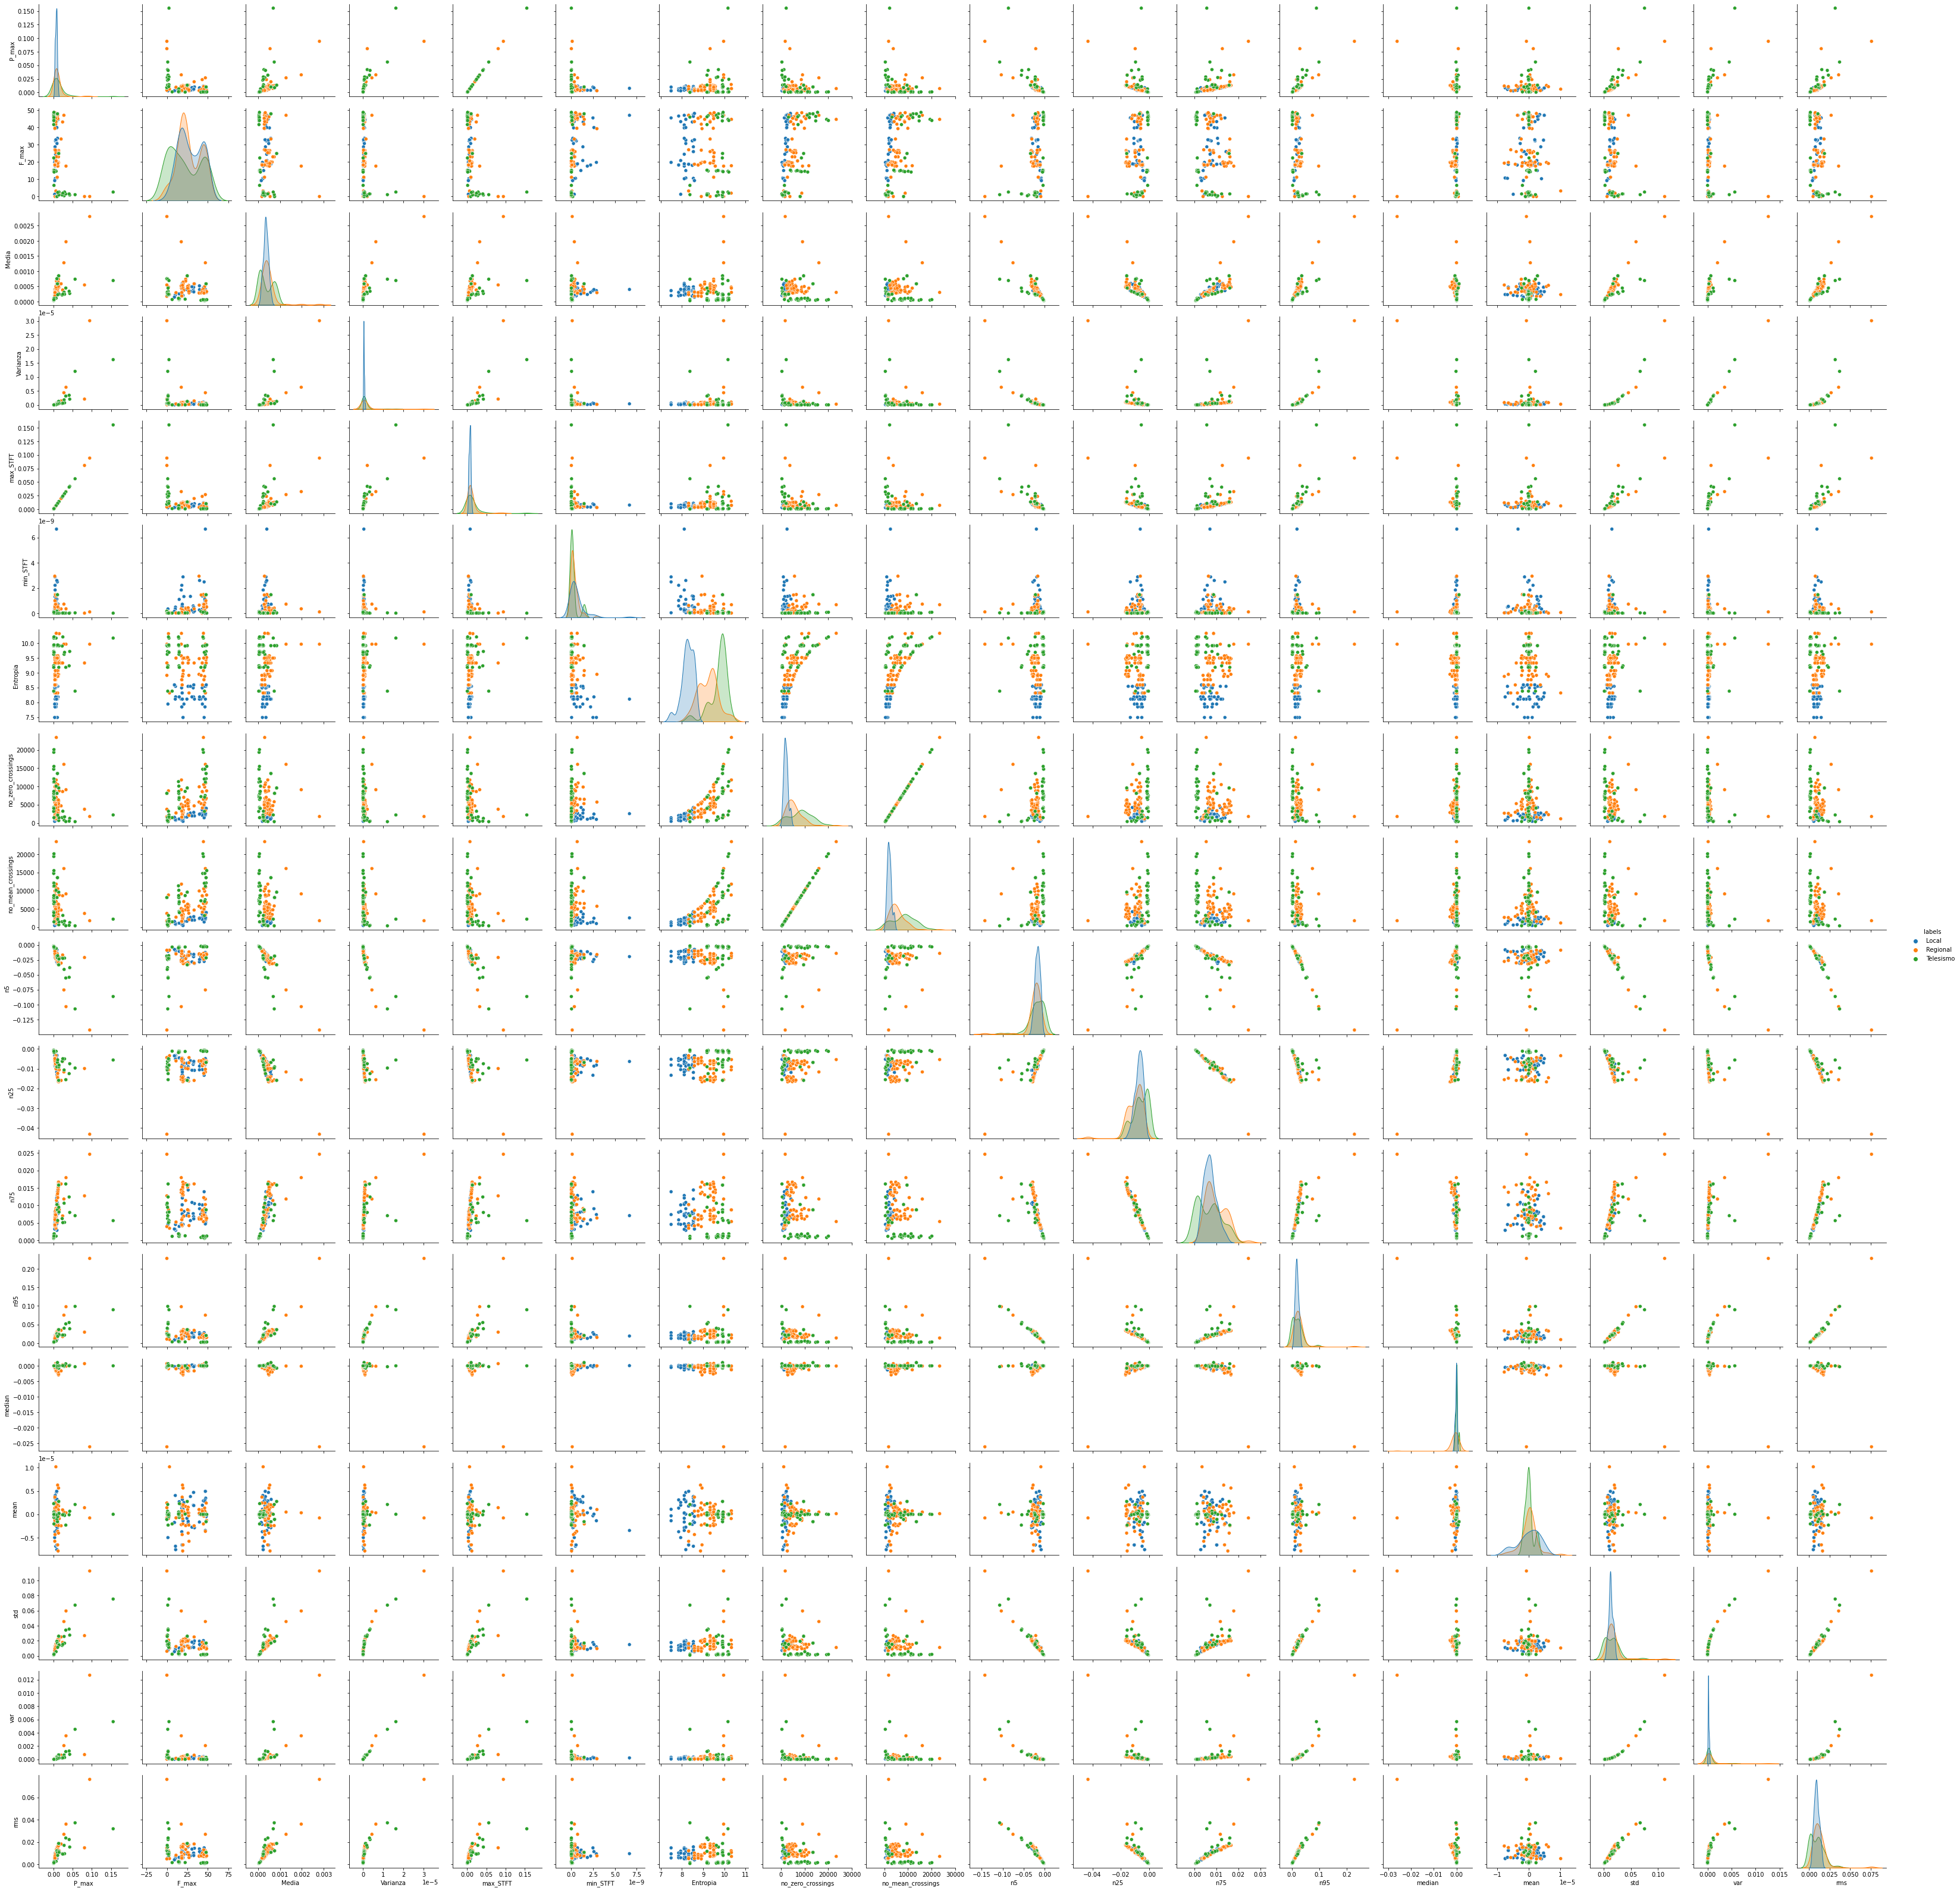

In [46]:
import seaborn as sns

sns.pairplot(dataframe, hue='labels', palette='tab10');

##**conclusiones**: 

- despues de estudiar el grafico obtenido para visualizar las cracteristicas extraidas, aunque es dificil lograr diferenciar los tipos de sismos si se logran ver unas zonas de ciertas cracteristicas en las que predominan unos tipos de sismos sobre otros.

- Entropia: esta variable se puede interpretar como el "ruido o desorden" que entrega un sistema, y como parece mas logico mientras mas grande sea el sismo mas entropia tendra y lo que se observa en el grafico es esto mismo, para sismos locales la entropia generalmente es menor, para los regionales es mayor y para los telesismos es aun mayor por lo que considero que es una caracteristica imortante para identificar el tipo de sismo.

- en estas graficas se puede observar mejor lo descrito en la anterior conclusion: no mean crossing vs entropia, varianza vs entropia, n95 vs entropia

- talvez para lograr obtener mas informacion que sirva para identificar el tipo de sismo se debe buscar caracterizar las señales con datos mas relacionados con la naturaleza de la señal, como por ejemplo la diferencia entre el parametro S y P , la amplitud, entre otros.

- de todas las demas graficas en las que aparentemente los datos estan superpuestos o revueltos tambien se puede sacar informacion, hay zonas de la grafica en las que todos los sismos estan presentes, pero en la misma grafica tambien hay pequeñas zonas en las que esta persente solo un tipo de sismo y por lo tanto tambien se pueden aprovechar esta informacion para lograr distinguir los sismos.

- En general el analisis mutivariado de señales es bastante util para clasificar todo tipo de señales y en el caso particular que se esta tranajando puede ser de gran ayuda identificando el tipo de sismo y generando alarmas que sirvan para disminuir los efectos dañinos de los mismos.